# 1. Исследование данных о российском кинопрокате



**Цель проекта:** 

* изучить рынок российского кинопроката и выявить текущие тренды,
* изучить фильмы, которые получили государственную поддержку. Насколько такие фильмы интересны зрителю.
* изучить динамику выхода фильмов по годам
* изучить динамику сборов от проката фильмов по годам
* определить влияние возрастного ограничения насборы фильмов. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, с чем это может быть связано?



## Шаг 1. Чтение данных и объединение их в один датафрейм. 

Все объекты из датасета `mkrf_movies` обязательно должны войти в новый датафрейм. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# загрузка данных
try:
    movies = pd.read_csv('mkrf_movies.csv')
    shows = pd.read_csv('mkrf_shows.csv')
except:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
# проверка первого файла
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# проверка второго файла
shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
# Информация о первом файле
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# Информация о втором файле
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Пропусков по объединяющему столбцу puNumber нет ни в movies (7486 из 7486 значений), ни в shows (3158 из 3158 значений)

In [7]:
# проверка полных дубликатов перед объединением
movies.duplicated().sum()

0

In [8]:
# проверка полных дубликатов перед объединением
shows.duplicated().sum()

0

In [9]:
# Так как у нас будет объединение по колонке 'puNumber', а она имеет целочисленный тип в таблице shows, 
# то нужно сменить тип на целочисленный и в таблице movies
# Так как пропусков нет, значит в какихто сроках есть текстовая информация, 
# заменим ее на 0 (на самом деле там одна строка со словом 'нет')
movies.loc[movies['puNumber'].str.isalpha(), 'puNumber'] = 0

In [10]:
movies['puNumber'] = movies['puNumber'].astype('int')

In [11]:
# проверим на наличие дубликатов по puNumber
movies[movies.duplicated(subset=['puNumber'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


2 дубликата по прокатным удостоверениям, посмотрим, как они выглядят:

In [12]:
movies.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"


In [13]:
movies.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


После проверки на портале открытых данных министерства культуры, дубликаты оставляем в данных **movies**, это не ошибка

In [14]:
# проверим на наличие дубликатов по puNumber
shows[shows.duplicated(subset=['puNumber'])]

,puNumber,box_office


Все прокатные удостоверения в данных **shows** уникальные

In [15]:
# объединение файлов
data = movies.merge(shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [16]:
# проверка, что вся таблица movies вошла в data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [17]:
# проверка, что вся таблица movies вошла в data
movies.query('puNumber in @data.puNumber').count()

title                    7486
puNumber                 7486
show_start_date          7486
type                     7486
film_studio              7468
production_country       7484
director                 7477
producer                 6918
age_restriction          7486
refundable_support        332
nonrefundable_support     332
budget                    332
financing_source          332
ratings                  6519
genres                   6510
dtype: int64

Все столбцы на месте, количество ненулевых значений в соответсвующих столбцах идентично, значит вся таблица movies в data

In [18]:
data_copy = data.copy(deep=True)

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверка типов данных


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Промежуточный вывод**
* Пропуски во всех колонках, кроме 'title', 'puNumber', 'show_start_date', 'type' 
* тип нужно поменять в 'show_start_date' на datetime
* после заполнения пропусков в колонке 'ratings' нужно сменить на float

In [20]:
# проверяем названия колонок
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [21]:
# переименовываем колонку
data = data.rename(columns={'puNumber': 'pu_number'})

In [22]:
# проверяем на наличие строк-дубликатов по всем колонкам
data.duplicated().sum()

0

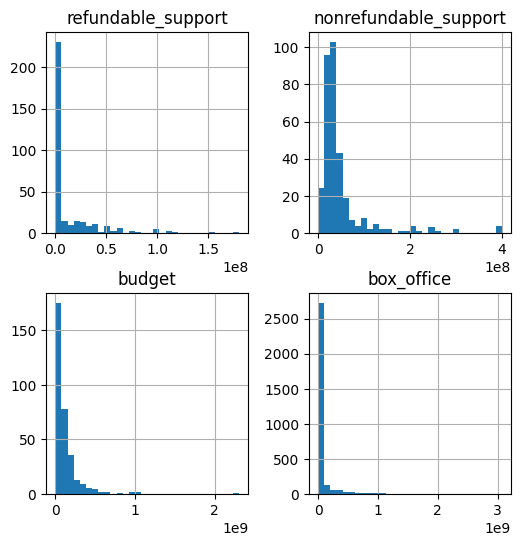

In [179]:
# гистограммы для числовых столбцов
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].hist(bins=30, figsize=(6,6));

In [24]:
# смотрим запись колонки 'show_start_date'
data.loc[0, 'show_start_date']

'2015-11-27T12:00:00.000Z'

In [25]:
# удаляем лишние символы в конце строки, чтобы потом перевести в тип datetime
data['show_start_date'] = data['show_start_date'].str.split('.').str.get(0)

In [26]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

**Итого по Шагу 2.1.** типы данных проверены и изменены

### Шаг 2.2. Поиск дубликатов в датафрейме


In [27]:
# Убираем все пробелы в начале и в конце строк, если они есть
list_col = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']
for column in list_col:
    data[column] = data[column].str.strip()
    data[column] = data[column].str.rstrip('_')
    data[column] = data[column].str.rstrip('.')

##### Страна производитель — 'production_country'

In [28]:
#len(data['production_country'].unique())
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [29]:
# приведем все к нижнему регистру, 
# и нужно заменить ' - ' на ', ', '-' на ', ', ' , ' на ', '
data['production_country'] = data['production_country'].str.replace(' - ', ', ')
data['production_country'] = data['production_country'].str.replace('-', ', ')
data['production_country'] = data['production_country'].str.replace(' , ', ', ')
data['production_country'] = data['production_country'].str.lower()

In [30]:
# одно значение в стране "2019"
data.loc[data['production_country'] == '2019']
data.loc[data['production_country'] == '2019', 'production_country'] = 'германия'

##### Тип фильма — 'type'

In [31]:
# проверка
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

##### Жанр фильма — 'genres'

In [32]:
# проверка
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [33]:
# приведем все к нижнему регистру, 
# и нужно заменить ',' на ', '
data['genres'] = data['genres'].str.replace(',', ', ')
data['genres'] = data['genres'].str.lower()

In [34]:
# В пункте 1.5.2 я решила проверить, что за 26 фильмов с жанром "история" на 4м месте по сборам,
# увидела там 'Тор.Рагнарек', который и поднял всю группу на 4-е место, нужно исправить главный жанр на фантастику
data.loc[data['title'] == 'Тор: Рагнарёк', 'genres' ] = 'фантастика, драма, боевик'

##### Студия-производитель — 'film_studio'

In [35]:
# проверка
print(len(data['film_studio'].unique()))
data['film_studio'].unique()

5461


array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

Уникальных значений очень много для поиска неявных дубликатов

##### Режиссёр — 'director'

In [36]:
# проверка
print(len(data['director'].unique()))
data['director'].unique()

4801


array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

Уникальных значений очень много для поиска неявных дубликатов

##### Продюссер — 'producer'

In [37]:
# проверка
print(len(data['producer'].unique()))
data['producer'].unique()

5335


array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Уникальных значений очень много для поиска неявных дубликатов

##### Возрастная категория — 'age_restriction'

In [38]:
# проверка
print(len(data['age_restriction'].unique()))
data['age_restriction'].unique()

5


array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Неявных дубликатов нет, исправлять нечего

##### Источник государственного финансирования — 'financing_source'

In [39]:
data[data.duplicated(subset=['pu_number'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...","германия, великобритания, италия, испания",Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма, мелодрама, история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",сша,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия, криминал",NaN


In [40]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [41]:
# проверка после вычистки строк, появились ли дубликаты
data[data.duplicated(subset=['title', 'pu_number'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [42]:
# проверим есть ли дубликаты по фильму и дате проката
data[data.duplicated(subset=['title', 'show_start_date'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1301,Эпидемия,221035513,2013-10-07 12:00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...","испания, франция","Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма, фантастика, триллер",NaN
1474,Адъютант его превосходительства,111010713,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Е.Ташков,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.2,"военный, приключения, драма",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",сша,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия, приключения",NaN
2073,Егор Булычев и другие,111013414,2014-10-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Ю.Солнцева,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,драма,NaN
2114,Мертвые души,111029614,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Л.Трауберг,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия, драма",500.00
2192,Последние пять лет,121005715,2015-03-25 12:00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",сша,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"мюзикл, драма, мелодрама","52,495.00"
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...","южная корея, кнр",Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"мультфильм, семейный, спорт","14,152,495.90"
3087,Анархисты,121002316,2016-02-03 12:00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,драма,"332,371.00"
4018,Тайна Красной планеты,124000511,2011-03-09 12:00:00,Анимационный,"Эдалт Свим, Ступид Манки, Уильямс Стрит, Имидж...",сша,Саймон Уэллс,"Стив Джей Бойд, Роберт Земекис, Джек Рапке, Ст...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.1,"мультфильм, фантастика, боевик",NaN
4043,Бугай,124001210,2010-09-24 12:00:00,Анимационный,"Иллюзион Студиос, Процесо","мексика, аргентина",Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"мультфильм, боевик, триллер",NaN


Всего 8 дубликатов, и среди них только 3 с заполненным 'box_office', оставлю как есть, на исследование не сильно повлияет

In [43]:
# проверим есть ли дубликаты по фильму и сборам
data.loc[data.duplicated(subset=['title', 'box_office']) & ~data['box_office'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [44]:
# проверим есть ли дубликаты по фильму и рейтингу
print('количество дубликатов по фильму: ', data.duplicated(subset=['title']).sum())
print('количество дубликатов по фильму и по рейтингу: ', data.duplicated(subset=['title', 'ratings']).sum())

количество дубликатов по фильму:  786
количество дубликатов по фильму и по рейтингу:  786


**Итого по Шагу 2.2.**

* В некоторых столбцах исправлены неявные дубликаты, в некторых это сделать невозможно, так как уникальных значений очень много.
* В данных есть 714 дубликатов по фильму, в этих дубликатах всего 8 строк с одинаковыми датами проката, значит оставшиеся 706 строк - это прокат фильмов в другие года, удалять их не будем, так как это влияет на количесвто фильмов в году.
* Среди 8 дубликатов по дате, 3 с заполненным box_office, удалять не будем, суммировать с дубликатом не будем, оставим как есть, так как их мало.

### Шаг 2.3. Пропуски в датафрейме


In [45]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [46]:
def print_isna(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

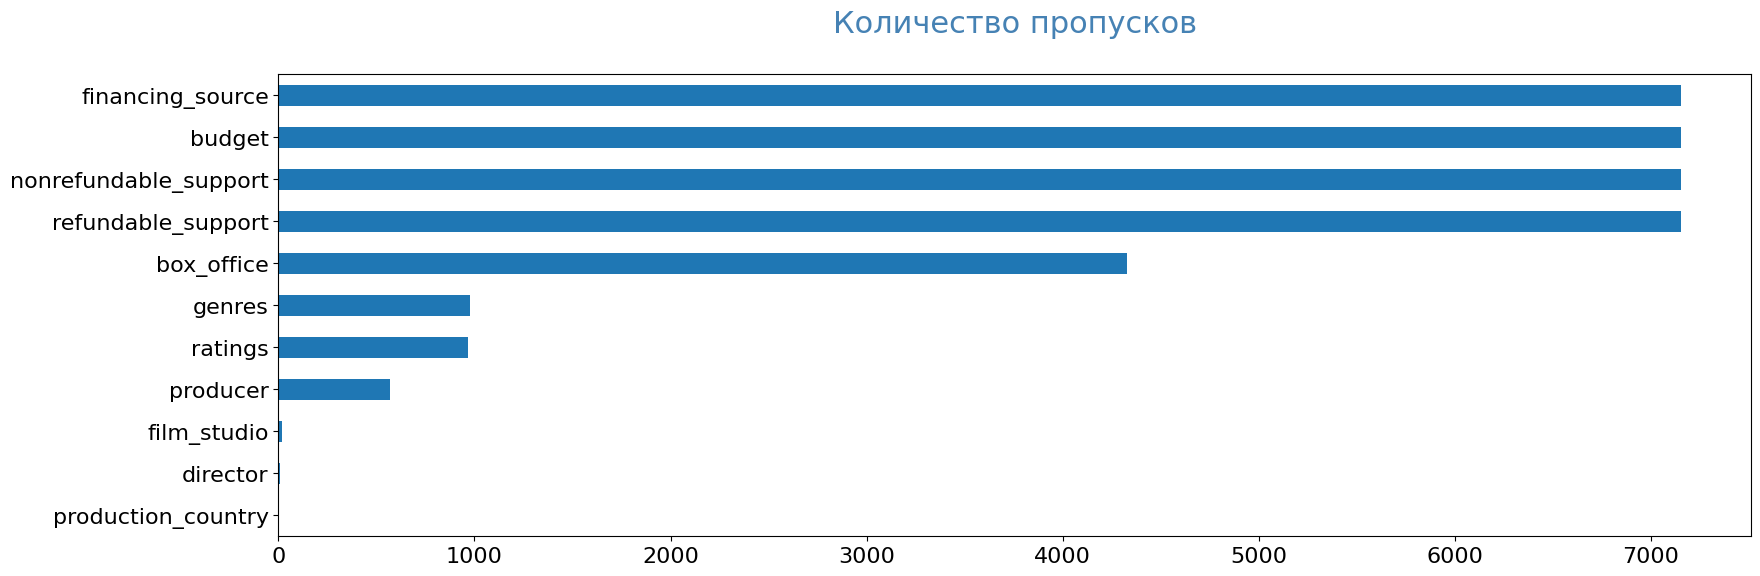

In [47]:
print_isna(data)

In [48]:
# пробуем заполнить пропуски в колонках из list_col значениями, которые соответствуют значению в 'title'
list_col = ['film_studio', 'production_country', 'director', 'producer', 'ratings', 'genres']
for column in list_col:
    print(column)
    print(data[column].isna().sum())
    data.loc[data[column].isna(), column] = (
        data.loc[data[column].isna(), 'title'].map(data.groupby('title')[column].first())
    )
    print(data[column].isna().sum())
    print()

film_studio
18
18

production_country
2
2

director
9
9

producer
568
557

ratings
967
967

genres
976
976



К сожалению почти все пропуски находятся в строках с уникальными фильмами ('title'). Заполняем каждую колонку отдельно в порядке возрастания относительно количества пропусков

##### Страна производитель — 'production_country'

In [49]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",None,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский, комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,None,None,None,None,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм, комедия",NaN


In [50]:
data['production_country'] = data['production_country'].fillna('россия')
data['production_country'].isna().sum()

0

##### Режисер — 'director'

In [51]:
data[data['director'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,великобритания,None,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,None,None,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",великобритания,None,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,None,None,NaN
3840,Зур концерт (Большой концерт),217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",россия,None,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",россия,None,None,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,None,None,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",россия,None,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,сша,None,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт, музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,None,россия,None,None,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм, комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,великобритания,None,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,None,None,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,великобритания,None,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт, музыка",NaN


In [52]:
# все строки с пропущенным director - уникальны, это записи концертов, поэтому заменим NaN на слово 'пропуск'
data['director'] = data['director'].fillna('пропуск')
data['director'].isna().sum()

0

##### Студия-производитель — 'film_studio'

In [53]:
data[data['film_studio'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,None,"сша, великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,None,россия,пропуск,None,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм, комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,None,россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,None,None,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,None,россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,None,None,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,None,россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,None,россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
6399,Доживем до каникул?,111021918,2018-11-15 12:00:00,Художественный,None,россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,None,россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма, криминал, детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,None,россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,None,россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN


In [54]:
# заполним студию значением 'не известно'
data['film_studio'] = data['film_studio'].fillna('пропуск')
data['film_studio'].isna().sum()

0

##### Продюсер — 'producer'

In [55]:
data.loc[data['producer'].isna(), 'production_country'].unique()

array(['ссср', 'ссср, венгрия', 'чехословакия', 'сша',
       'россия, казахстан, сша', 'ссср, швеция',
       'ссср, франция, англия, куба, гдр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия',
       'франция, италия, великобритания, сша', 'чехия', 'ссср, финляндия',
       'великобритания, сша', 'япония', 'ссср, польша',
       'ссср, швейцария, франция', 'франция', 'великобритания',
       'австралия', 'италия', 'украина', 'франция, бельгия',
       'мексика, франция', 'великобритания, германия', 'россия', 'иран',
       'республика узбекистан', 'бразилия', 'франция, россия',
       'индонезия', 'ссср, фрг, западный берлин',
       'сша, канада, афганистан, бельгия, франция',
       'сша, великобритания, германия, новая зеландия, бельгия, франция',
       'бельгия, испания, канада, нидерланды', 'ссср, венгрия, чсср, гдр',
       'индия, мексика', 'ссср, афганистан', 'ссср, монголия',
       'ссср, албания',
       'великобритания, сша, австралия, ирландия, германия, куба

In [56]:
# много фильмов, выпущенных в СССР, а значит это то, что продюссер - это Госкино СССР
data.loc[(data['producer'].isna()) & (data['production_country'] == 'ссср'), 'producer'] = (
    data['producer'].fillna('Госкино СССР')
)

In [57]:
# проверка
data['producer'].isna().sum()

193

In [58]:
# остальные пропуски заполним значением 'пропуск'
data['producer'] = data['producer'].fillna('пропуск')
data['producer'].isna().sum()

0

##### Рейтинг фильма — 'ratings'

In [59]:
data[data['ratings'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",сша,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,"А.Столпер, Б.Иванов",Госкино СССР,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,None,None,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,сша,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,None,None,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",чехия,Владимир Дрга,пропуск,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,None,None,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Б.Барнет,Госкино СССР,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,None,None,NaN


In [60]:
# есть ли в значения ratings == 0
data.query('ratings == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [61]:
# теперь проверим уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', None, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4',
       '3.1', '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2',
       '3.4', '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%',
       '90%', '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2',
       '1.7', '9.0', '98%', '8.9', '9.1'], dtype=object)

In [62]:
# так как есть значения с %, то колонку невозможно привести к численному типу
# значения с % означают, что рейтинг еще формруется, то есть фактически равен 0, так как не хватает данных
# сохраним значения с % в отдельном столбце, а в колонке ratings заменим их на 0
data['ratings_progress'] = data.loc[data['ratings'].str.find('%') != -1, 'ratings'] 
data.loc[data['ratings'].str.find('%') != -1, 'ratings'] = 0
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 0, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [63]:
data['ratings'] = data['ratings'].astype(float)

In [64]:
data['ratings'].dtype

dtype('float64')

##### Жанр фильма — 'genres'

In [65]:
data[data['genres'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",сша,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,None,NaN,None
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,"А.Столпер, Б.Иванов",Госкино СССР,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.00,None,NaN,None
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,сша,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.00,None,NaN,None
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",чехия,Владимир Дрга,пропуск,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,None,NaN,None
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Б.Барнет,Госкино СССР,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,None,NaN,None


In [66]:
# заполним все пропуски значением 'пропуск'
data['genres'] = data['genres'].fillna('пропуск')
data['genres'].isna().sum()

0

##### refundable_support,  nonrefundable_support, financing_source, budget 

Исходя из описания - эти данные заполнены только в фильмах с государственной поддержкой, поэтому пропуски не заполняем

##### Сборы в рублях — 'box_office'

Так как в заполненных данных есть значения, равные 0, то пропуски оставим, как есть, чтобы не мешать с нулевыми значениями

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

**Итого по Шагу 2.3.** 

* в 'production_country' 2 пропуска заполнены по смыслу значением "россия", 
* в 'producer' часть пропусков заполнено по смыслу "госкино СССР", а оставшаяся часть значением "пропуск"
* в 'director', 'film_studio' пропуски заполнены значением "пропуск"
* refundable_support, nonrefundable_support, financing_source, budget оставили как есть, при исследовании нужны будут именно пропуски, чтобы они игнорировались в группировках.
* в ratings пропуск оставили пропусками, а несформированный рейтинг заменили 0
* с 'genre' пропуски заполнили значением "пропуск"
* 'box_office' оставили как есть с пропусками

### Шаг 2.4. Категориальные значения

 * Лишние пробелы, дефисы вместо запятых и т.д. удалены, заменены в разделе Шаг 2.2.
 * в колонках 'film_studio', 'director', 'producer' очень много уникальных значений

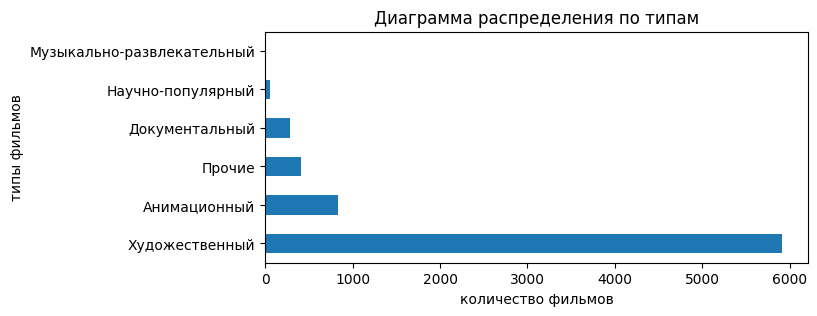

In [180]:
data\
    .groupby('type')['type']\
    .count().sort_values(ascending=False)\
    .plot(kind='barh', y='type', figsize=(7,3))\
    .set_title('Диаграмма распределения по типам')
plt.xlabel('количество фильмов')
plt.ylabel('типы фильмов')
plt.show();

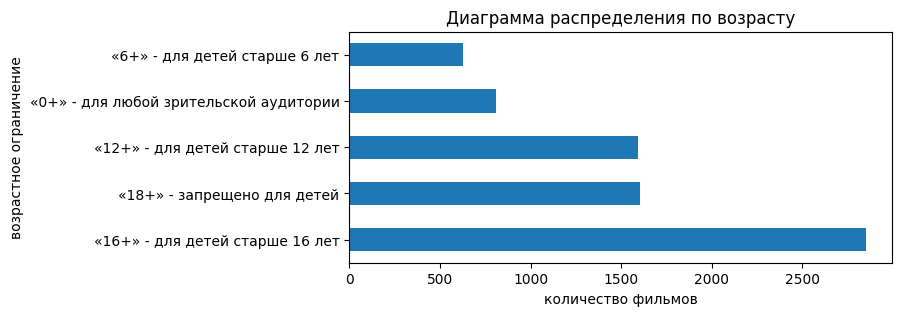

In [181]:
data\
    .groupby('age_restriction')['age_restriction']\
    .count().sort_values(ascending=False)\
    .plot(kind='barh', y='type', figsize=(7,3))\
    .set_title('Диаграмма распределения по возрасту')
plt.xlabel('количество фильмов')
plt.ylabel('возрастное ограничение')
plt.show();

<a id='1.2.9_fin_source'></a>

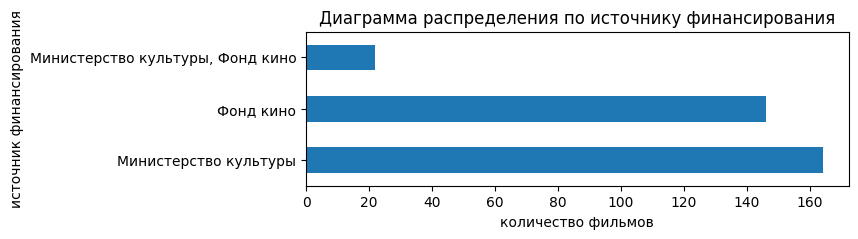

In [182]:
data\
    .groupby('financing_source')['financing_source']\
    .count().sort_values(ascending=False)\
    .plot(kind='barh', y='type', figsize=(7,2))\
    .set_title('Диаграмма распределения по источнику финансирования')
plt.xlabel('количество фильмов')
plt.ylabel('источник финансирования')
plt.show();

**Итого по Шагу 2.4.**

**Большая часть фильмов относится к:**
* типу Художественный,
* для аудитории 16+

**Меньшая часть фильмов относится к:**
* типу музыкально-развлекательных,
* для детей 6+

**Фильмы с господержкой (их всего 332 в этих данных)**
* почти половина фильмов с господдержкой финансируется из Министерства культуры 
* немного меньше половины из Фонда кино
* и оставшаяся часть из совместного фонда

**Диаграммы** на остальные категориальные столбцы без предварительной группировки и обработки строить нет смысла из-за огромного количества уникальных значений — это будет в шаге 3


### Шаг 2.5. Количественные значения

##### Общий бюджет фильма — 'budget'

In [71]:
# проверка, что при заполненном бюджете, остальные колонки заполнены 
budget_gov = data.loc[~data['budget'].isna()]
print(budget_gov['financing_source'].isna().sum())
print(budget_gov['refundable_support'].isna().sum())
budget_gov['nonrefundable_support'].isna().sum()

0
0


0

In [72]:
# так как budget включает в себя полный объем государственной поддержки, то он должен быть меньше суммы
# refundable_support + nonrefundable_support
# проверим, есть ли некорректные строки
print(data.query('budget < (refundable_support + nonrefundable_support)')['budget'].count())
data.query('budget < (refundable_support + nonrefundable_support)')

17


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",NaN
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",NaN
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40",NaN
2532,Бармен,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия, фэнтези","67,418,974.80",NaN
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40",NaN
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия, драма","1,957,738.51",NaN
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия, мелодрама","72,937,783.20",NaN
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",NaN
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия, мелодрама","70,299,052.00",NaN
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",NaN


Если заглянуть в источник данных: портал открытых данных Министерства культуры, то видно, что для всех этих фильмов данные о бюджете не предоставлены правообладателем. Можно зайти на кинопоиск, и забить их вручную, так как не хочется терять 17 строк из 332

In [73]:
data.loc[2058, 'budget'] = 140000000
data.loc[2472, 'budget'] = 115000000
data.loc[2532, 'budget'] = 60000000
data.loc[2615, 'budget'] = 1000000000
data.loc[2788, 'budget'] = 102000000
data.loc[3565, 'budget'] = 380000000
data.loc[3739, 'budget'] = 50000000
data.loc[5673, 'budget'] = 115000000

In [74]:
print(data.query('budget < (refundable_support + nonrefundable_support)')['budget'].count())
data.query('budget < (refundable_support + nonrefundable_support)')

9


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",NaN
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия, драма","1,957,738.51",NaN
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",NaN
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия, мелодрама","70,299,052.00",NaN
3675,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,"20,000,000.00","20,000,000.00",0.00,Фонд кино,5.20,"мультфильм, фэнтези, семейный","55,108,014.76",NaN
5806,Два хвоста,114001018,2018-05-31 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"10,000,000.00","60,000,000.00",0.00,Фонд кино,5.00,"мультфильм, детский","106,514,301.03",NaN
6008,Принцесса и дракон,114003018,2018-08-23 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"40,000,000.00","40,000,000.00",0.00,Фонд кино,5.20,"мультфильм, фэнтези, детский","83,366,328.66",NaN
6323,Баба Яга,114006518,2018-11-08 12:00:00,Анимационный,"ООО ""Арт Пикчерс Студия""",россия,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",«6+» - для детей старше 6 лет,0.00,"138,969,465.00",0.00,Фонд кино,0.00,пропуск,"1,334,699.40",None
6823,Большое путешествие,114002419,2019-04-20 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"60,000,000.00","120,000,000.00",0.00,Фонд кино,6.20,"мультфильм, комедия, приключения","147,606,826.51",NaN


Пока оставим эти строки, если будут искажать исследование, то удалим

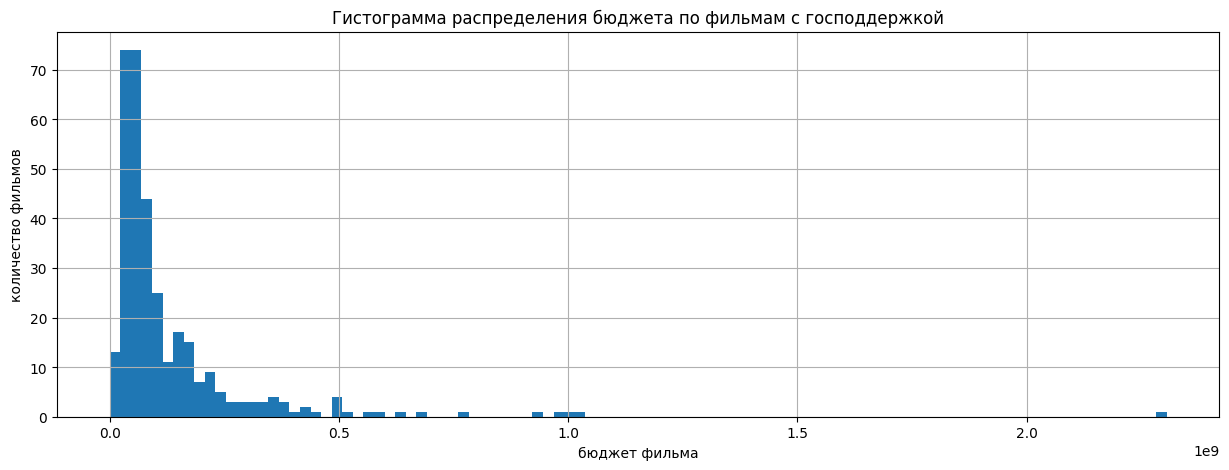

count             332.00
mean      133,139,355.24
std       194,084,029.19
min                 0.00
25%        45,048,762.50
50%        70,590,586.00
75%       148,938,916.50
max     2,305,074,303.00
Name: budget, dtype: float64

In [183]:
data['budget'].hist(bins=100, figsize=(15,5)).set_title('Гистограмма распределения бюджета по фильмам с господдержкой')
plt.xlabel('бюджет фильма')
plt.ylabel('количество фильмов')
plt.show();
data['budget'].describe()

In [76]:
# интересно, что это за фильмы с миллиардным бюджетом
data.query('budget >= 1000000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","1,000,000,000.00",Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40",NaN
5437,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези, комедия, семейный","511,775,548.00",NaN
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","россия, китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения, фэнтези","333,597,059.59",NaN


**Промежуточный вывод:** больше всего в качестве господержки выделяют суммы до 250 млн.р., надо глянуть на мультфильм бюджетом 1млрд.р

##### Объём возвратных средств государственной поддержки — 'refundable_support'

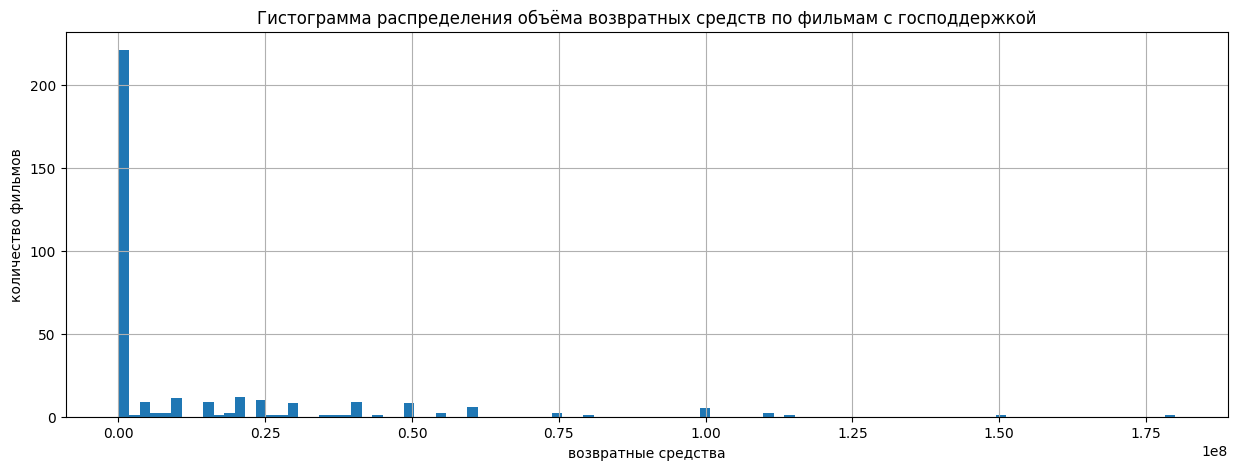

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

In [184]:
data['refundable_support']\
    .hist(bins=100, figsize=(15,5))\
    .set_title('Гистограмма распределения объёма возвратных средств по фильмам с господдержкой')
plt.xlabel('возвратные средства')
plt.ylabel('количество фильмов')
plt.show();
data['refundable_support'].describe()

In [78]:
data.query('refundable_support == 0')['refundable_support'].count()

221

##### Объём невозвратных средств государственной поддержки — 'nonrefundable_support'

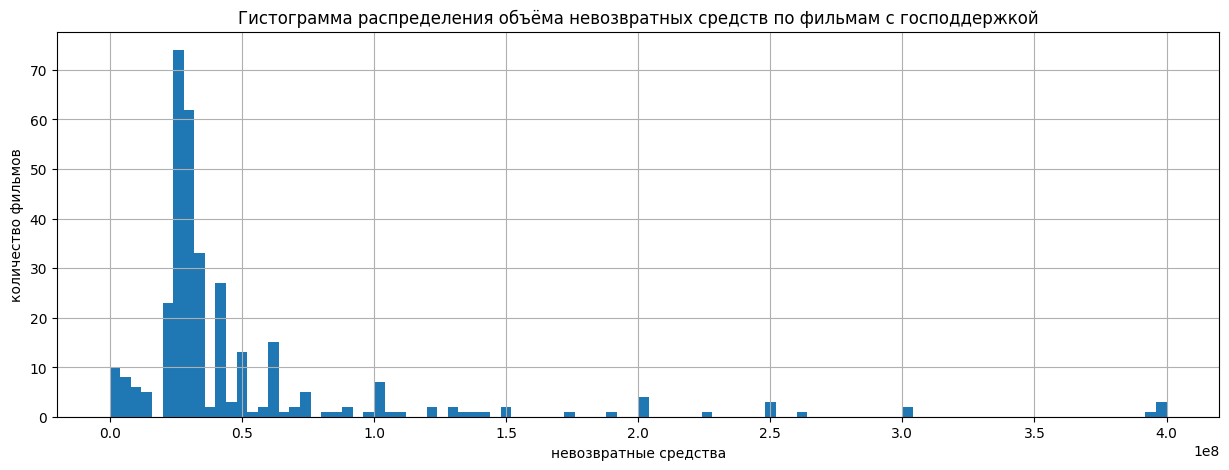

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

In [185]:
data['nonrefundable_support']\
    .hist(bins=100, figsize=(15,5))\
    .set_title('Гистограмма распределения объёма невозвратных средств по фильмам с господдержкой')
plt.xlabel('невозвратные средства')
plt.ylabel('количество фильмов')
plt.show();
data['nonrefundable_support'].describe()

**Промежуточный вывод**

* основная часть фильмов (221 из 332) не возвращают средства господдержки обратно
* есть несколько фильмов с господдержкой с колоссальным бюджетом >= 1 млрд.р., 
* медианный бюджет фильмов с господдержкой = 70 млн.р

<a id='1.2.13.3'></a>

##### Рейтинг фильма на кинопоиске — 'ratings'

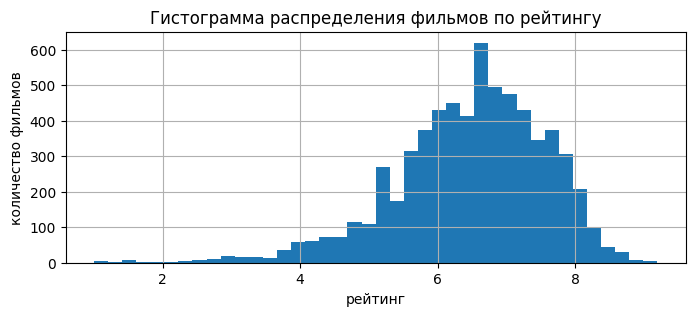

count   6,490.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

In [186]:
# исключим 0-е значения из гистограммы
data\
    .loc[data['ratings'] != 0, 'ratings']\
    .hist(bins=40, figsize=(8,3))\
    .set_title('Гистограмма распределения фильмов по рейтингу')
plt.xlabel('рейтинг')
plt.ylabel('количество фильмов')
plt.show();
data.loc[data['ratings'] != 0, 'ratings'].describe()

**Промежуточный вывод:**  средний рейтинг среди тех фильмов, которые имеют рейтинг, 6.48

### Шаг 2.6. Добавление новых столбцов

##### 'show_year'

- столбец с информацией о годе проката. Выделить год из даты премьеры фильма.

In [81]:
data['show_year'] = pd.DatetimeIndex(data['show_start_date']).year

##### 'gen_genre' и 'first_dir'

- два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [82]:
# функция извлечения части строки до запятой
def add_first_part(column):
    a = column.split(',')[0]
    return a

In [83]:
data['gen_genre'] = data['genres'].apply(add_first_part)
data['first_dir'] = data['director'].apply(add_first_part)
data.head(20)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Е.Матвеев,Госкино СССР,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма, военный",NaN,NaN,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,NaN,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,NaN,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,NaN,2015,фантастика,Тимур Бекмамбетов
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,В.Абдрашитов,Госкино СССР,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,NaN,2016,драма,В.Абдрашитов
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,В.Меньшов,Госкино СССР,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама, комедия","2,700.00",NaN,2013,мелодрама,В.Меньшов
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",сша,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл, мелодрама, комедия",NaN,NaN,2014,мюзикл,Джон Туртурро
8,Отпетые мошенники,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия, криминал",NaN,NaN,2016,комедия,Эрик Беснард
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","ссср, венгрия",В.Титов,пропуск,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама, комедия",NaN,NaN,2014,мелодрама,В.Титов


In [84]:
len(data['first_dir'].unique())

4602

##### 'rate_sup_to_budget'
- какую долю от общего бюджета фильма составляет государственная поддержка.

In [85]:
# создание столбца со значением доли господдержки в бюджете фильма
data.loc[data['budget'] != 0, 'rate_sup_to_budget'] =(
    ((data['refundable_support'] + data['nonrefundable_support'])/data['budget']).round(2)
)
data[~data['rate_sup_to_budget'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir,rate_sup_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",NaN,2013,драма,А.Атанесян,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,0.00,пропуск,"28,140.00",None,2014,пропуск,А.Якимчук,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",NaN,2013,комедия,Р.Давлетьяров,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",NaN,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",NaN,2014,драма,М.Угаров,0.62


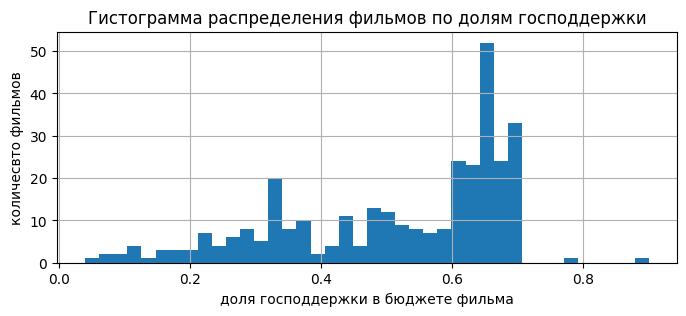

count   323.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.90
Name: rate_sup_to_budget, dtype: float64

In [187]:
data\
    .loc[data['rate_sup_to_budget'] != 0, 'rate_sup_to_budget']\
    .hist(bins=40, figsize=(8,3))\
    .set_title('Гистограмма распределения фильмов по долям господдержки')
plt.xlabel('доля господдержки в бюджете фильма')
plt.ylabel('количесвто фильмов')
plt.show();
data.loc[data['rate_sup_to_budget'] != 0, 'rate_sup_to_budget'].describe()

In [87]:
data.loc[data['rate_sup_to_budget'] > 0.7]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir,rate_sup_to_budget
3385,О любви (2017),111018816,2016-12-28 12:00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,"20,000,000.00","35,000,000.00","70,086,439.00","Министерство культуры, Фонд кино",0.00,пропуск,"11,332,412.00",None,2016,пропуск,В.Бортко,0.78
3739,Мифы,111004317,2017-06-07 12:00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,"25,000,000.00","20,000,000.00","50,000,000.00",Фонд кино,4.80,комедия,"50,451,949.00",NaN,2017,комедия,А.Молочников,0.90


**Промежуточный вывод:** 60% бюджета большей части фильмов с господдержкой составляет — господдержка

**Итого по Шагу 2.6.** новые столбцы в соответствии с заданием добавлены

## Шаг 3. Исследовательский анализ данных


### 3.1. Сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [88]:
# группируем по годам и считаем количество строк,
# так как box_office не заполнили ничем, то они исключаются из группировки автоматически
data_year =(
    data
    .groupby('show_year')[['title','box_office']].count()
)
data_year['box_office / title'] = (data_year['box_office']/ data_year['title']).round(2)
data_year

,title,box_office,box_office / title
show_year,,,
2010,985,105,0.11
2011,622,109,0.18
2012,593,128,0.22
2013,630,184,0.29
2014,807,279,0.35
2015,705,465,0.66
2016,818,526,0.64
2017,505,357,0.71
2018,891,475,0.53


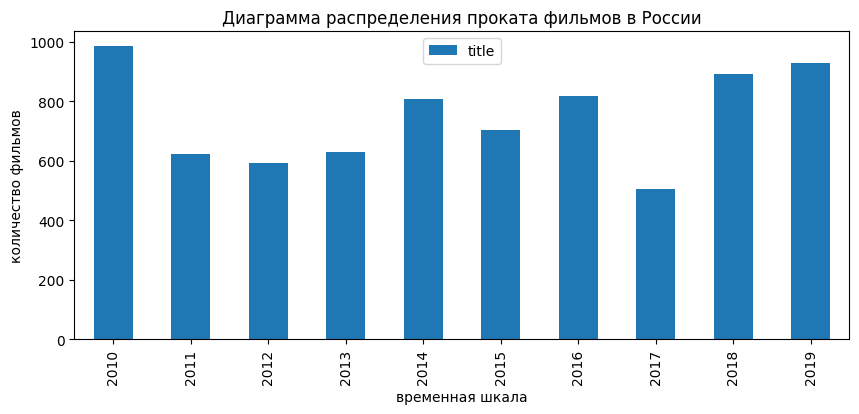

In [176]:
data_year.plot(kind='bar', y='title', figsize=(10,4))\
    .set_title('Диаграмма распределения проката фильмов в России')
plt.xlabel('временная шкала')
plt.ylabel('количество фильмов');

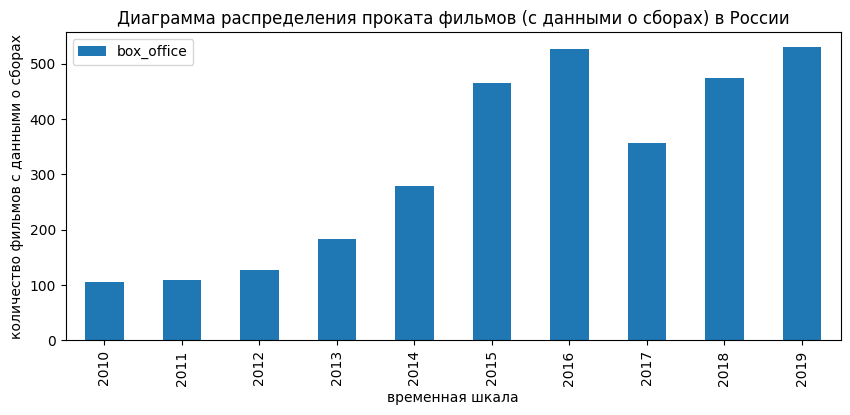

In [175]:
data_year.plot(kind='bar', y='box_office', figsize=(10,4))\
    .set_title('Диаграмма распределения проката фильмов (с данными о сборах) в России')
plt.xlabel('временная шкала')
plt.ylabel('количество фильмов с данными о сборах');

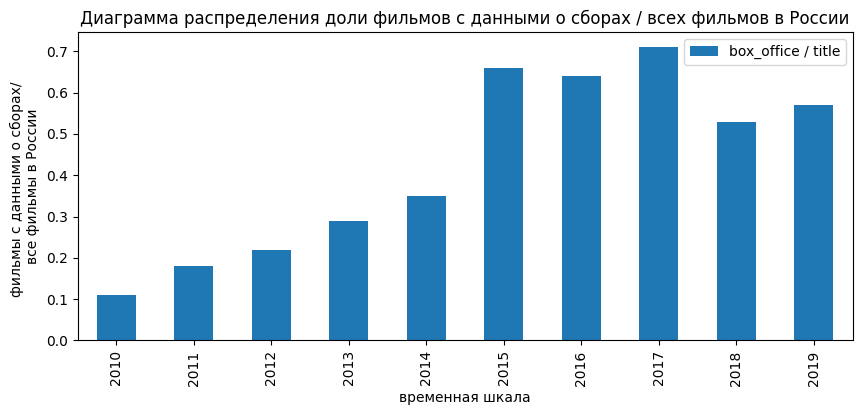

In [174]:
data_year.plot(kind='bar', y='box_office / title', figsize=(10,4))\
    .set_title('Диаграмма распределения доли фильмов с данными о сборах / всех фильмов в России')
plt.xlabel('временная шкала')
plt.ylabel('фильмы с данными о сборах/ \nвсе фильмы в России');

**Промежуточный вывод**

* Если смотреть просто по количеству фильмов за каждый год, то нет какой-либо зависимости, то поднимается, то опускается, только за последние 2 года (18-й и 19-й) количество фильмов в прокате увеличилось
* если смотреть на долю фильмов с информацией по сборам, то видно, что до 2013 года включительно такая доля < 30%
* в 2014 году доля таких фильмов уже 35%, а в 2015-2019гг доля таких фильмов в среднем 63%
   - это объясняется тем, что в 2014 году Фонд кино по заключенному государственному контракту от 12.05.2014г. №1252-01-41/03/14 стал опертором ЕАИС. Назначение указанной системы состоит в сборе, учёте и обработке сведений о публичной демонстрации кинофильмов в кинозалах российских кинотеатров. То есть до 2014 года, такие данные централизованно не обрабатывались: https://ekinobilet.fond-kino.ru/about/history/

### 3.2. Как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [92]:
# сборы от проката
data_box = (
    data
    .pivot_table(index='show_year', values='box_office', aggfunc=['sum','mean', 'median', 'count'])  
)
data_box.columns = ['sum_box_office', 'mean_box_office', 'median_box_office', 'count']
data_box

,sum_box_office,mean_box_office,median_box_office,count
show_year,,,,
2010,"2,428,654.00","23,130.04","1,700.00",105
2011,"14,102,765.00","129,383.17","3,000.00",109
2012,"6,955,423.00","54,339.24","5,660.00",128
2013,"29,799,706.20","161,954.92","3,522.50",184
2014,"7,444,951,859.20","26,684,415.27","18,160.00",279
2015,"39,497,365,196.40","84,940,570.31","4,920,933.00",465
2016,"47,866,299,741.91","91,000,569.85","3,846,679.41",526
2017,"48,563,707,217.51","136,032,793.33","9,968,340.00",357
2018,"49,668,403,134.32","104,565,059.23","8,891,102.21",475


count               10.00
mean    24,151,972,247.71
std     24,138,278,781.26
min          2,428,654.00
25%         18,027,000.30
50%     23,471,158,527.80
75%     48,285,856,520.17
max     49,668,403,134.32
Name: sum_box_office, dtype: float64
Средние сборы с 2010 по 2013:  13321637.05


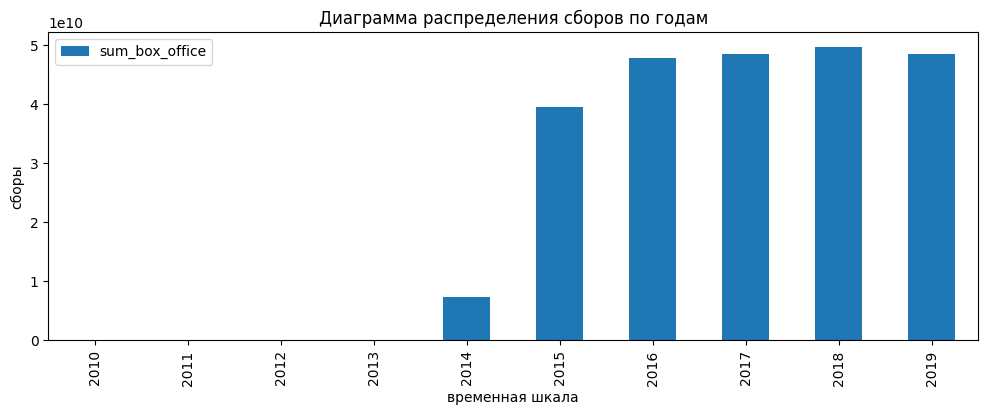

In [171]:
print(data_box['sum_box_office'].describe())
print('Средние сборы с 2010 по 2013: ', data_box.loc[2010:2013, 'sum_box_office'].sum() / 4)
data_box\
    .plot(kind='bar', y='sum_box_office', figsize=(12,4))\
    .set_title('Диаграмма распределения сборов по годам')
plt.xlabel('временная шкала')
plt.ylabel('сборы');

**Промежуточный вывод**

* с 2010 по 2013 количество сборов примерно на одном уровне ~ 13,32 млн.р
* резкий скачок в 2014 году до 7.44 млрд.р в связи с контрактом от 12.05.2014г. №1252-01-41/03/14
* в 2015 скачок относительно 2014 года до 39.5 млрд.р,
  - здесь я думаю скачок связан с тем, что данные в 2014-м году только с мая, а летом в прокат выходят не кассовые фильмы, ну и система отрабатывалась скорее всего.
* с 2016 по 2018, сборы одного порядка ~48.7 млрд.р, немного увеличивались с каждым годом.
* в 2019 - сборы немного упали

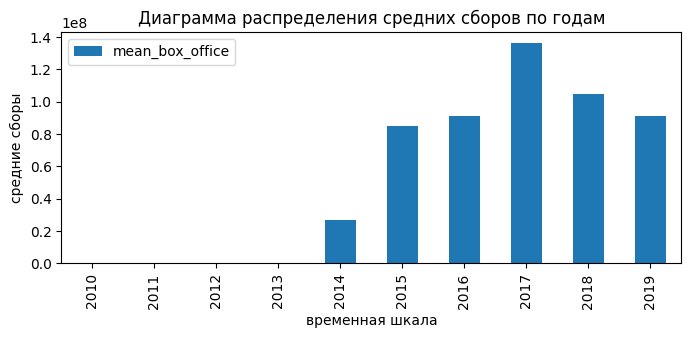

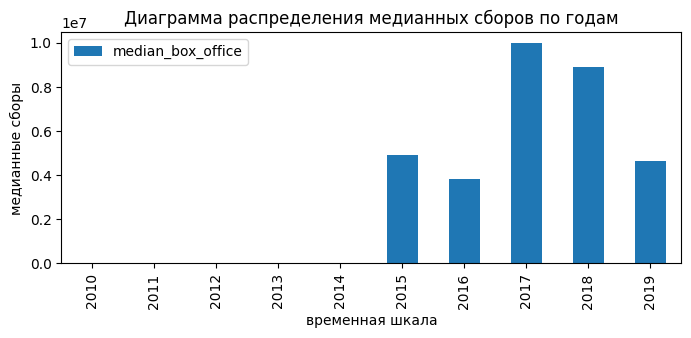

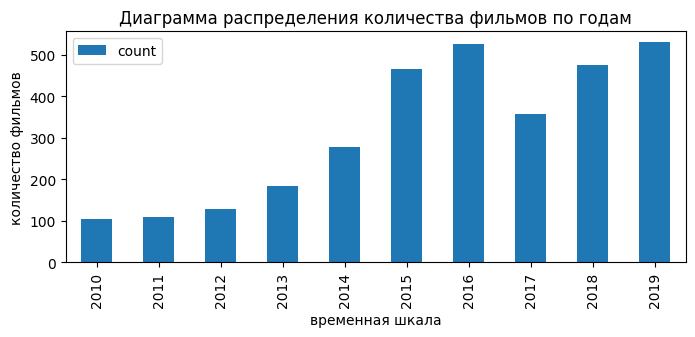

In [169]:
data_box\
    .plot(kind='bar', y='mean_box_office', figsize=(8,3))\
    .set_title('Диаграмма распределения средних сборов по годам')
plt.xlabel('временная шкала')
plt.ylabel('средние сборы')
data_box\
    .plot(kind='bar', y='median_box_office', figsize=(8,3))\
    .set_title('Диаграмма распределения медианных сборов по годам')
plt.xlabel('временная шкала')
plt.ylabel('медианные сборы')
data_box\
    .plot(kind='bar', y='count', figsize=(8,3))\
    .set_title('Диаграмма распределения количества фильмов по годам')
plt.xlabel('временная шкала')
plt.ylabel('количество фильмов')
plt.show();

**Промежуточный вывод**

* самые высокие средние и медианные сборы в 2017 году, я думаю это потому что в 2017 году меньше фильмов, чем в 2015, 16, 18, 19 г.г., но зато в этом году вышел кассовый фильм "Движение вверх", сборы которого на 1_000_000_000 больше сборов других фильмов и в 2017, и в других годах
* до 2014 года смотреть на средние и медианные значения особо нет смысла, выборка — нерепрезентативная
* с 2014 года медианные значения на порядок меньше средних - это говорит о том, что каждый год есть несколько кассовых фильмов, сборы которых очень высокие по сравнению с остальными фильмами.
* в целом средние значения то снижаются, то поднимаются от года к году, какой-то линейной тенденции нет

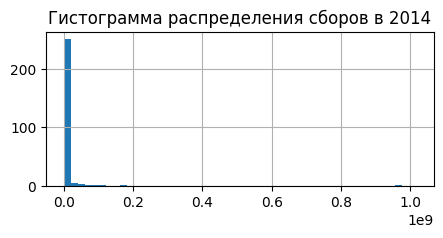

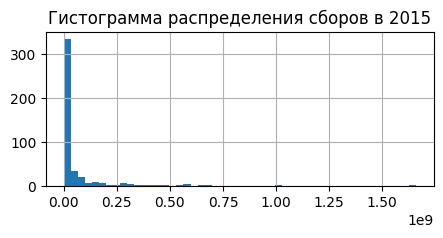

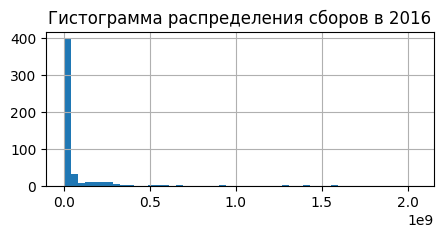

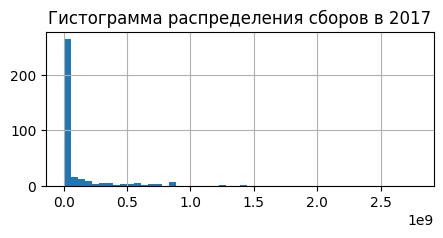

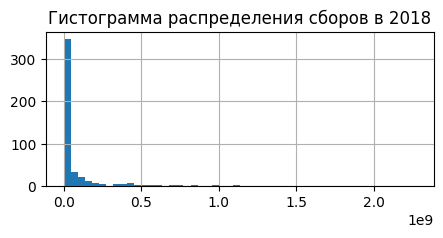

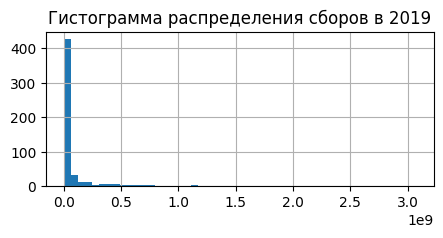

In [95]:
# проверка малых медианных значений
list_y=[2014, 2015, 2016, 2017, 2018, 2019]
year=0
for year in list_y:
    data.query('show_year == @year')['box_office'].hist(bins=50, figsize=(5,2))\
    .set_title(f'Гистограмма распределения сборов в {year}')
    plt.show()

**Промежуточный вывод:** да, каждый год есть несколько кассовых фильмов, сборы которых на несколько порядков выше сборов остальных фильмов

### 3.3. Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, то, с чем это может быть связано.

In [110]:
data_age =(
    data
    .query('show_year >= 2015')
    .pivot_table(index='age_restriction', columns='show_year', values='box_office', aggfunc=['sum'])
)
data_age = (
    data_age.loc[['«0+» - для любой зрительской аудитории',
                  '«6+» - для детей старше 6 лет', 
                  '«12+» - для детей старше 12 лет',
                  '«16+» - для детей старше 16 лет',
                  '«18+» - запрещено для детей']].T
)
data_age

age_restriction  «0+» - для любой зрительской аудитории  \
    show_year                                             
sum 2015                                 379,054,578.37   
    2016                                 150,228,848.67   
    2017                                 229,598,930.00   
    2018                                  32,449,002.11   
    2019                                  17,746,066.82   

age_restriction  «6+» - для детей старше 6 лет  \
    show_year                                    
sum 2015                      8,701,799,371.41   
    2016                     12,053,146,008.24   
    2017                     12,086,142,145.76   
    2018                     10,104,974,623.41   
    2019                     12,852,548,650.86   

age_restriction  «12+» - для детей старше 12 лет  \
    show_year                                      
sum 2015                       13,616,082,008.91   
    2016                       12,204,446,524.39   
    2017                        7,851,427,660.67   
    2018                       14,267,291,660.69   
    2019                       12,680,198,773.67   

age_restriction  «16+» - для детей старше 16 лет  «18+» - запрещено для детей  
    show_year                                                                  
sum 2015                       11,368,120,870.27             5,432,308,367.44  
    2016                       16,664,548,541.74             6,793,929,818.87  
    2017                       18,745,042,900.06             9,651,495,581.02  
    2018                       16,503,602,346.96             8,760,085,501.15  
    2019                       12,753,418,984.60            10,121,796,303.64

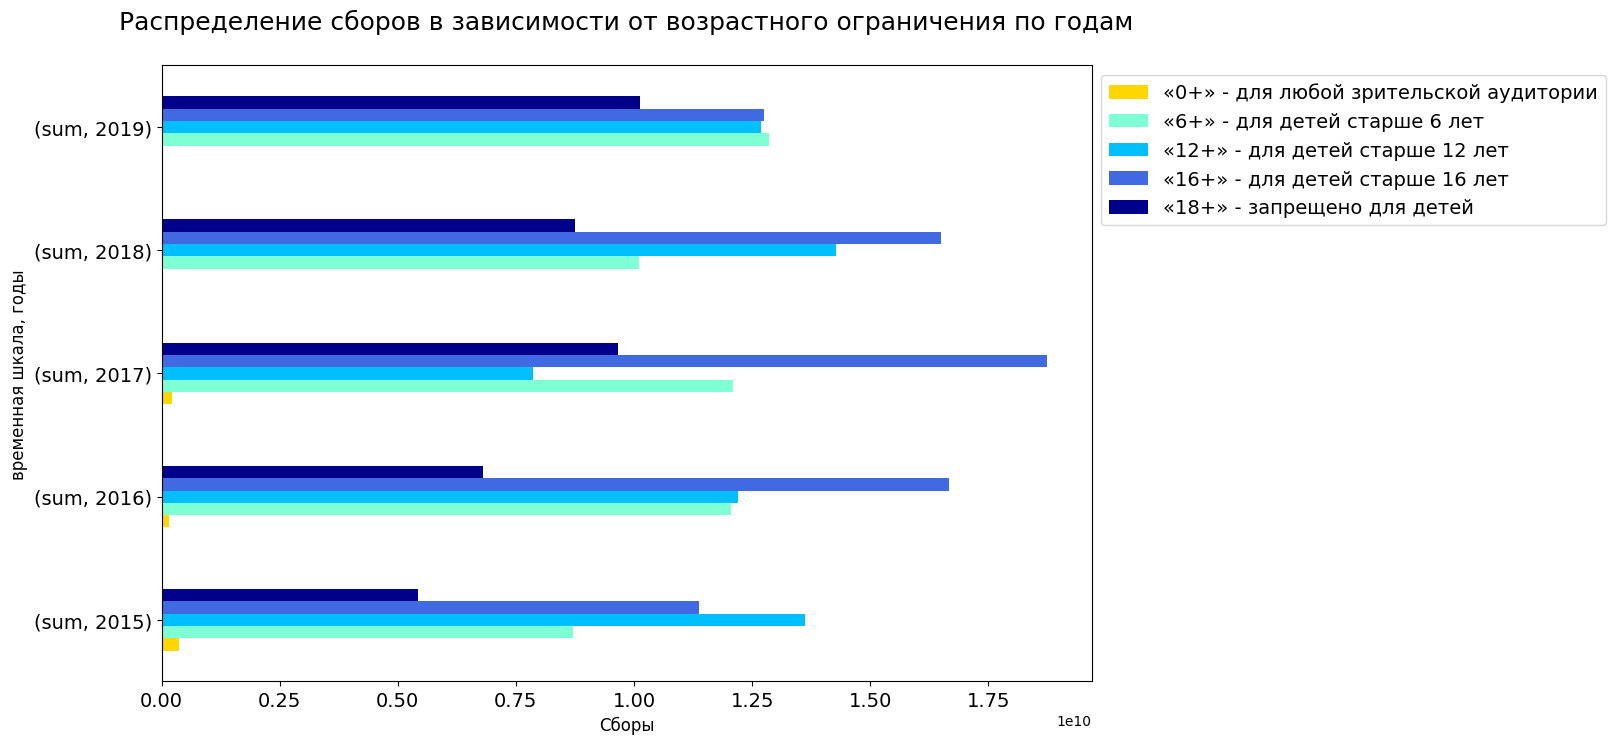

In [130]:
colors = ['gold', 'aquamarine', 'deepskyblue', 'royalblue', 'darkblue']
data_age\
    .plot.barh(figsize=(12,8), fontsize=14, color=colors)\
    .set_title('Распределение сборов в зависимости от возрастного ограничения по годам\n', fontsize=18)
plt.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Сборы', fontsize=12)
plt.ylabel('временная шкала, годы', fontsize=12)
plt.show();

**Промежуточный вывод**
* Если брать весь срез с 2015 по 2019 года:
  - то самые кассовые фильмы — это "16+",
  - на втором месте — "12+"
  - на третьем с небольшим отставанием — "6+"
  - на четвертом месте — "18+", немного больше от половины сборов "16+"
  - а меньше всего сборов принесли фильмы "0+"
* От года к году картина немного меняется:
  - в 2019 год, почти одинаковое распределение между категориями "6+", "16+", "12+", лишь немного вперед ушла категория "6+"
  - категории "6+" и "12+" постоянно меняются местами

## Шаг 4. Исследование фильмов, которые получили государственную поддержку


In [189]:
# доля фильмов с господдержкой
data_rus =(
    data
    .query('production_country == "россия"')
    .pivot_table(index='show_year', 
                 values=['title', 'financing_source'],
                 aggfunc=['count'])
)
data_rus['rate'] = (data_rus['count', 'financing_source'] / data_rus['count', 'title']).round(2)
data_rus

count       rate
          financing_source title     
show_year                            
2010                     0   179 0.00
2011                     0   109 0.00
2012                     0    74 0.00
2013                     2    75 0.03
2014                    15   128 0.12
2015                    81   170 0.48
2016                    60   168 0.36
2017                    41   123 0.33
2018                    53   482 0.11
2019                    64   315 0.20

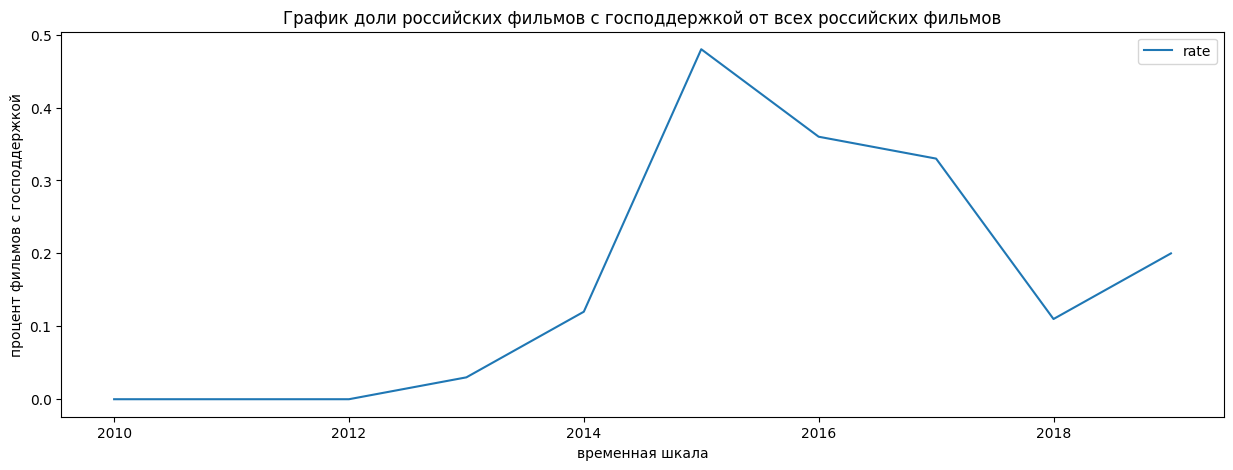

In [191]:
data_rus.plot(y='rate', figsize=(15,5))\
    .set_title('График доли российских фильмов с господдержкой от всех российских фильмов')
plt.xlabel('временная шкала')
plt.ylabel('процент фильмов с господдержкой')
plt.show();

**Промежуточный вывод:** в 2015 году почти половина российских фильмов получила господдержку, потом доля таких фильмов пошла на убыль до 0,11 (2018), а в 2019 снова увеличилась до 0,2

In [121]:
# расчет сборов по годам для фильмов с господдержкой
data_rus_gov =(
    data
    .loc[(data['production_country'] == 'россия') & ~(data['financing_source'].isna())]
    .pivot_table(index='show_year', values=['rate_sup_to_budget', 'box_office'], aggfunc=['sum', 'mean'])
)
data_rus_gov.columns = ['sum_box_office', 'sum_rate_sup_to_budget', 'mean_box_office', 'mean_rate_sup_to_budget']
data_rus_gov = data_rus_gov.drop(columns='sum_rate_sup_to_budget')
data_rus_gov

,sum_box_office,mean_box_office,mean_rate_sup_to_budget
show_year,,,
2013,"20,322,385.10","10,161,192.55",0.47
2014,"1,012,690,927.10","67,512,728.47",0.52
2015,"5,376,721,000.93","67,209,012.51",0.54
2016,"6,030,002,853.10","102,203,438.19",0.56
2017,"10,865,075,300.96","278,591,674.38",0.49
2018,"9,909,053,917.99","186,963,281.47",0.52
2019,"7,711,689,662.09","137,708,743.97",0.52


<a id='box_office_dep_on_s'></a>

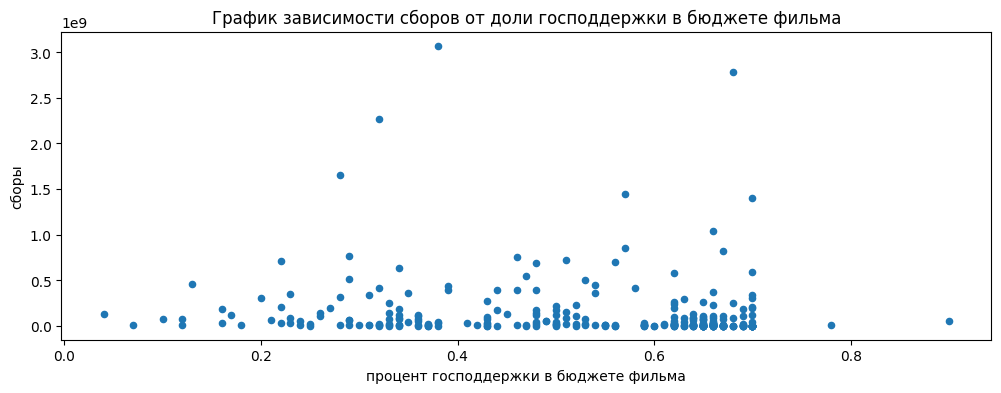

In [194]:
data\
    .loc[(data['production_country'] == 'россия') & ~(data['financing_source'].isna())]\
    .sort_values(by='rate_sup_to_budget')\
    .plot(kind='scatter', style='o', x='rate_sup_to_budget', y='box_office', figsize=(12,4))\
    .set_title('График зависимости сборов от доли господдержки в бюджете фильма')
plt.xlabel('процент господдержки в бюджете фильма')
plt.ylabel('сборы')
plt.show();

**Промежуточный вывод:** сборы очень низкие, независимо от доли господдержки в бюджете фильма, есть только несколько фильмов с высокими сборами, но это совсем не потому, что они получили господдержку. Если посмотреть выборочно на фильмы, котороые получили господдержку -— то выясняется, что это абсолютно неизвестные, никогда нигде не цитируемые фильмы, то есть обосновали получение господдержки, сняли фильм (возможно для конкурса, какого-нибудь фестиваля, а может вообще просто так), поучавствовали и все, на полку.

In [196]:
# рейтинг фильмов с господдержкой, специально не отфильтровываем 0-е значения
data_rus_rt =(
    data
    .query('production_country == "россия"')
    .pivot_table(index='show_year',
                 columns='financing_source', 
                 values=['ratings'],
                 aggfunc=['mean'])
)
data_rus_rt.columns = ['ratings_mk', 'ratings_mk_and_fk', 'ratings_fk']
data_rus_rt

,ratings_mk,ratings_mk_and_fk,ratings_fk
show_year,,,
2013,8.10,NaN,5.30
2014,5.25,6.75,5.58
2015,5.54,6.39,5.73
2016,5.37,4.97,5.26
2017,5.04,7.35,5.95
2018,5.92,7.60,5.31
2019,5.85,5.90,6.21


<a id='fin_s_r'></a>

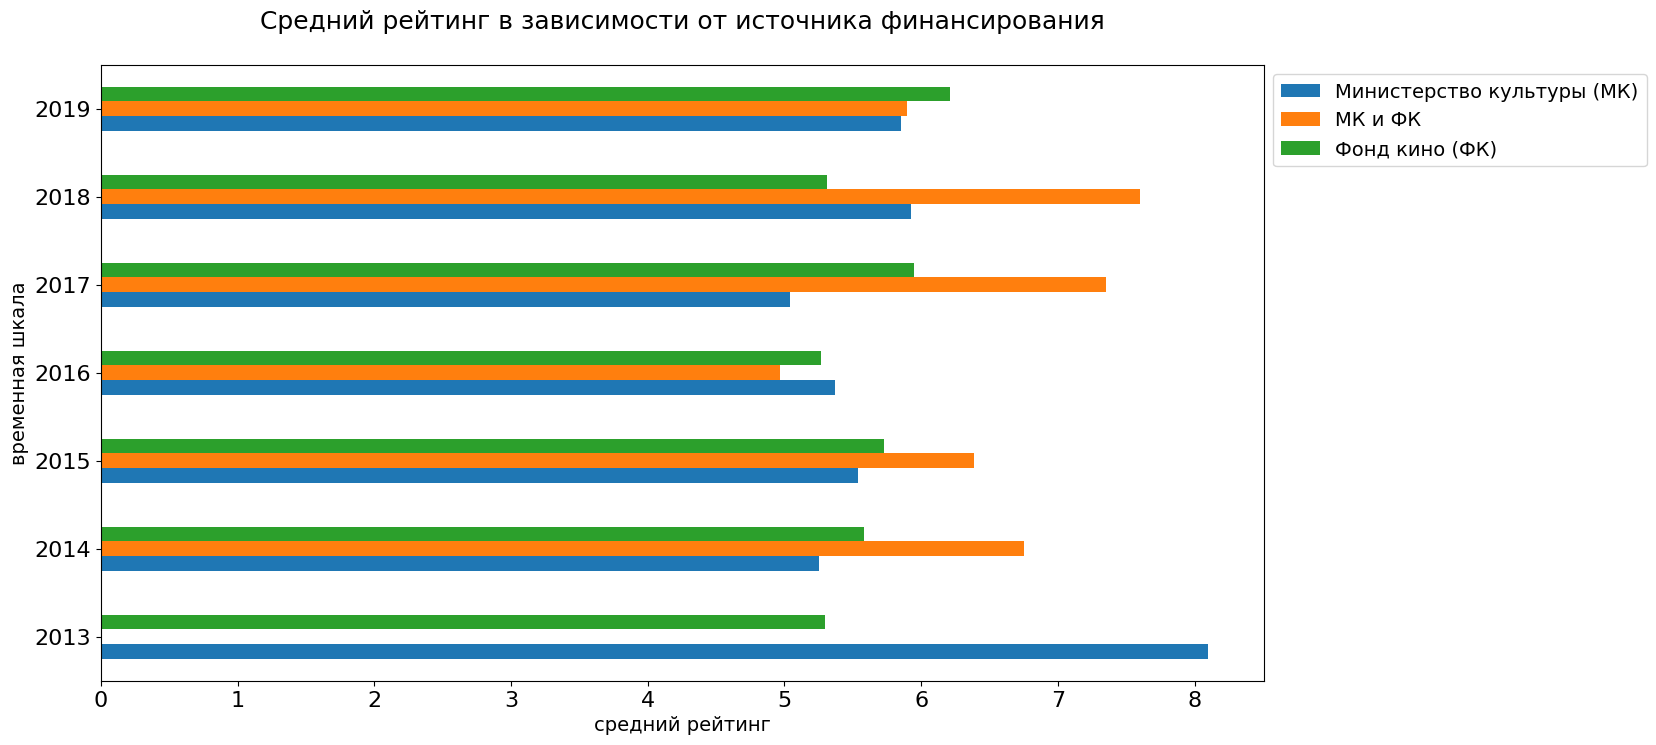

In [204]:
data_rus_rt\
    .plot.barh(figsize=(15,8), fontsize=16)\
    .set_title('Средний рейтинг в зависимости от источника финансирования\n', fontsize=18)
plt.legend(['Министерство культуры (МК)', 'МК и ФК', 'Фонд кино (ФК)'], 
           fontsize=14, 
           loc='upper left', 
           bbox_to_anchor=(1, 1))
plt.xlabel('средний рейтинг', fontsize=14)
plt.ylabel('временная шкала', fontsize=14)
plt.show();

**Промежуточный вывод:** совместное финансирование МК и ФК чаще всего дает лучше результат, чем финансирование по отдельности, кроме 2016г. и 2019г.

## Шаг 5. Дополнительное исследование

### 5.1. Зависят ли сборы от рейтинга, а рейтинг от бюджета

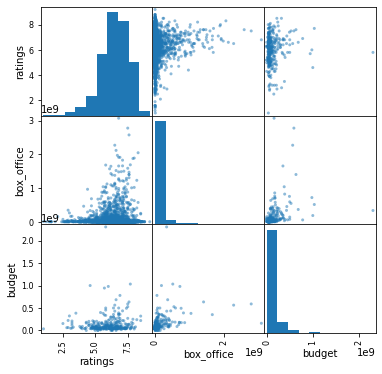

,ratings,box_office,budget
ratings,1.00,0.09,0.08
box_office,0.09,1.00,0.38
budget,0.08,0.38,1.00


In [125]:
data_rt = data.query('ratings != 0')[['ratings', 'box_office', 'budget']]
pd.plotting.scatter_matrix(data_rt, figsize=(6,6))
plt.show()
data_rt.corr()

In [126]:
# шуточный параметр, "самая дорогая единица рейтинга"
data['b/r'] = data.query('ratings != 0 and budget != 0')['budget'] / data.query('ratings != 0')['ratings']
data.loc[data['b/r'] == data['b/r'].max()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir,rate_sup_to_budget,b/r
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","россия, китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения, фэнтези","333,597,059.59",NaN,2019,приключения,О.Степченко,0.12,"397,426,603.97"


In [127]:
#"самая дешевая единица рейтинга"
data.loc[data['b/r'] == data['b/r'].min()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir,rate_sup_to_budget,b/r
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00,Анимационный,"ООО ""Колобанга""",россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,"11,520,000.00","18,706,080.00",Министерство культуры,7.00,"мультфильм, приключения, детектив",NaN,NaN,2016,мультфильм,А.Романец,0.62,"2,672,297.14"


**Зависимостей нет:**

* фильмы с высоким рейтингом могут провалиться в прокате,
* и наоборот фильм с высокими сборами может иметь довольно низкий рейтинг,
* фильм с малым бюджетом может иметь успех,
* и наоборот фильм с раздутым бюджетом может быть довольно посредственным
* в номинации "самая дорогая единица рейтинга" выигрывает фильм "Тайна печати дракона"(2019, россия, китай)
* пойду смотреть с сыном "Колобанга" :)

### 5.2. Зависят ли сборы и рейтинг от жанра

In [131]:
data_gen = (
    data
    .pivot_table(index='gen_genre', values=['ratings','box_office'], aggfunc=['mean', 'median', 'count'])
)
data_gen.columns = ['mean_box_office', 'mean_r', 'median_box_office', 'median_r', 'count_box_office', 'count_r']
data_gen = data_gen.reset_index()
data_gen

,gen_genre,mean_box_office,mean_r,median_box_office,median_r,count_box_office,count_r
0,аниме,"41,300,226.98",7.34,"2,238,131.25",7.60,34,74
1,биография,"90,577,083.83",7.01,"9,319,951.95",6.90,21,33
2,боевик,"116,943,501.42",6.51,"10,819,136.00",6.70,236,617
3,вестерн,"80,352,164.86",7.30,"1,825,288.96",7.90,5,7
4,военный,"75,453,495.70",6.73,"7,400,330.25",6.65,22,46
5,детектив,"116,849,510.03",6.65,"14,407,891.00",6.65,21,56
6,детский,"216,932.15",6.01,"27,569.00",7.20,20,28
7,для взрослых,"774,210.00",4.47,"774,210.00",4.10,1,3
8,документальный,"2,351,043.56",7.24,"812,581.00",7.30,99,219
9,драма,"27,564,653.78",6.74,"1,538,252.50",6.80,694,1688


In [136]:
# жанры с малым количеством фильмов и сборами < 500000000 собираем в одну группу 'разные'
data_gen.loc[data_gen.query('count_r < 20 and mean_box_office < 500000000').index, 'gen_genre'] = 'разные'
data_gen_gp = data_gen.groupby('gen_genre').agg({
    'mean_box_office':'mean',
    'mean_r':'mean',
    'median_box_office':'mean',
    'median_r':'mean',
    'count_box_office':'sum',
    'count_r':'sum'
})
data_gen_gp

,mean_box_office,mean_r,median_box_office,median_r,count_box_office,count_r
gen_genre,,,,,,
аниме,"41,300,226.98",7.34,"2,238,131.25",7.60,34,74
биография,"90,577,083.83",7.01,"9,319,951.95",6.90,21,33
боевик,"116,943,501.42",6.51,"10,819,136.00",6.70,236,617
военный,"75,453,495.70",6.73,"7,400,330.25",6.65,22,46
детектив,"116,849,510.03",6.65,"14,407,891.00",6.65,21,56
детский,"216,932.15",6.01,"27,569.00",7.20,20,28
документальный,"2,351,043.56",7.24,"812,581.00",7.30,99,219
драма,"27,564,653.78",6.74,"1,538,252.50",6.80,694,1688
история,"88,303,176.50",6.36,"2,978,832.26",6.40,18,25


In [139]:
# рейтинг от жанра
data_gen_r = data_gen_gp.sort_values(by='mean_r', ascending=False)
data_gen_r

,mean_box_office,mean_r,median_box_office,median_r,count_box_office,count_r
gen_genre,,,,,,
аниме,"41,300,226.98",7.34,"2,238,131.25",7.60,34,74
документальный,"2,351,043.56",7.24,"812,581.00",7.30,99,219
спорт,"520,364,785.91",7.14,"86,086,226.17",7.00,6,9
биография,"90,577,083.83",7.01,"9,319,951.95",6.90,21,33
мюзикл,"105,926,920.11",6.80,"8,949,051.16",7.05,20,64
драма,"27,564,653.78",6.74,"1,538,252.50",6.80,694,1688
военный,"75,453,495.70",6.73,"7,400,330.25",6.65,22,46
детектив,"116,849,510.03",6.65,"14,407,891.00",6.65,21,56
разные,"18,692,126.14",6.56,"5,381,303.06",6.63,14,44


**Промежуточный вывод:** все-таки это очень индивидуально, по данным жанр "аниме" самый крутой, но количество фильмов в этом жане не очень большое, видимо зрители аниме более лояльного склада характера при оценке, чем, например зрители ужасов. В ужасах наоборот довольно большое количество фильмов с данными, но если зритель — "эксперт" по ужасам, то он будет ставить низкий рейтинг даже на страшные фильмы по мнению большинства, а если фильм прям жуть жуткий, то он тоже может получить низкий рейтинг от этого самого большинства или вообще не быть просмотренным. С остальными фильмами ситуация похожа — все индивидуально, вообще не стоит отбирать фильмы к просмотру по рейтингу на кинопоиске, это мое личное мнение, и оно вот подтверждается этой таблицей 

In [140]:
# сборы от жанра
data_gen_b = data_gen_gp.sort_values(by='mean_box_office', ascending=False)
data_gen_b

,mean_box_office,mean_r,median_box_office,median_r,count_box_office,count_r
gen_genre,,,,,,
спорт,"520,364,785.91",7.14,"86,086,226.17",7.00,6,9
фантастика,"296,681,932.30",6.54,"28,968,064.05",6.70,176,411
фэнтези,"184,088,454.05",6.52,"2,242,675.25",6.60,144,358
боевик,"116,943,501.42",6.51,"10,819,136.00",6.70,236,617
детектив,"116,849,510.03",6.65,"14,407,891.00",6.65,21,56
мультфильм,"109,026,369.66",6.25,"2,660,830.11",6.45,339,538
мюзикл,"105,926,920.11",6.80,"8,949,051.16",7.05,20,64
биография,"90,577,083.83",7.01,"9,319,951.95",6.90,21,33
история,"88,303,176.50",6.36,"2,978,832.26",6.40,18,25


In [135]:
data.query('gen_genre == "спорт"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,ratings_progress,show_year,gen_genre,first_dir,rate_sup_to_budget,b/r
850,Легенда № 17,111007012,2012-12-24 12:00:00,Художественный,"ООО"" Студия ""ТРИТЭ"" Никиты Михалкова""",россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"спорт, драма, биография","33,290.00",NaN,2012,спорт,Н.Лебедев,NaN,NaN
1334,Чемпионы,111000314,2014-01-15 12:00:00,Художественный,"ООО ""ЕМ Продакшн""",россия,"А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (...","Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.90,"спорт, драма","1,607,970.00",NaN,2014,спорт,А.Аксененко,NaN,NaN
1547,Гонка (Rush),121024813,2013-09-27 12:00:00,Художественный,"Гросс Крик Пикчерз, Эксклюзив Медиа Групп, Име...","сша, германия, великобритания",Рон Ховард,"Брайан Грейзер, Эндрю Итон, Эрик Феллнер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"спорт, драма, биография",NaN,NaN,2013,спорт,Рон Ховард,NaN,NaN
2369,Выше,126005114,2014-12-05 12:00:00,Прочие,Тетон Грейвити Рисерч,сша,"Джереми Джонс, Стив Джонс, Тодд Джонс","Стив Джонс, Тодд Джонс, Джефф Харасимович",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"спорт, драма",NaN,NaN,2014,спорт,Джереми Джонс,NaN,NaN
2648,Вне/себя,121015115,2015-07-20 12:00:00,Художественный,"Эндгейм Интертейнмент, Рам Бергман Продакшнз",сша,Тарсем Сингх,"Рэм Бергман, Питер Шлессель, Джеймс Д.Штерн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"спорт, драма, комедия","152,779,068.00",NaN,2015,спорт,Тарсем Сингх,NaN,NaN
3135,Чемпионы: Быстрее. Выше. Сильнее,111021115,2015-12-22 12:00:00,Художественный,"ООО ""Энджой мувиз""",россия,А.Аксененко,"Г.Малков, В.Поляков",«6+» - для детей старше 6 лет,0.00,"40,000,000.00","90,276,774.00",Фонд кино,7.00,"спорт, драма","168,688,859.10",NaN,2015,спорт,А.Аксененко,0.44,"12,896,682.00"
3785,Эластико,111016416,2016-10-18 12:00:00,Художественный,"ООО ""Пятый элемент"", ООО ""РЕНОВАЦИО интертейнм...",россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,0.00,"15,000,000.00","30,000,000.00",Фонд кино,6.30,"спорт, мелодрама, криминал","19,393,384.34",NaN,2016,спорт,М.Расходников,0.50,"4,761,904.76"
5653,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт, драма","2,779,686,144.00",NaN,2017,спорт,А.Мегердичев,0.68,"78,692,292.13"
6286,МЫ ПОБЕДИЛИ!,112009418,2018-10-10 12:00:00,Документальный,"ООО ""Проиводственная Студия ""УРАЛКИНО""",россия,А.Турчанинов,А.Турчанинов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"спорт, драма",NaN,NaN,2018,спорт,А.Турчанинов,NaN,NaN


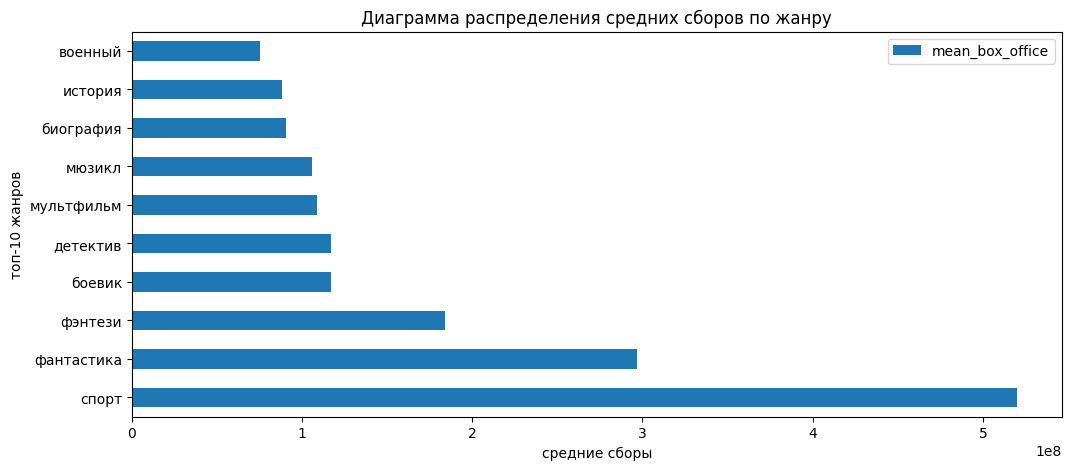

In [206]:
data_gen_b\
    .head(10)\
    .plot(kind='barh', y='mean_box_office', figsize=(12,5))\
    .set_title('Диаграмма распределения средних сборов по жанру')
plt.xlabel('средние сборы')
plt.ylabel('топ-10 жанров')
plt.show();

**Промежуточный вывод:** 

* самый кассовый жанр — спорт (если взглянуть на список фильмов, то кассовость жанра определил фильм "Движение вверх" (2017))
* остальные жанры практически ожидаемо заняли свои места, напишу первые 3 после спорта:
  - 2-е место: фантастика (это все супергеройские фильмы)
  - 3: фэнтези
  - 4: боевик
* на фильмы этих жанров идут с большей вероятностью, чем на другие  

### 5.3. Сравнение сборов российских фильмов и иностранных

In [208]:
data_ros = (data
            .query('production_country == "россия"')
            .groupby('show_year')['box_office'].sum().reset_index()
           )
data_ros.columns = ['show_year', 'rus_box_office']

In [209]:
data_for = (data
            .query('production_country != "россия"')
            .groupby('show_year')['box_office'].sum().reset_index()
           )
data_for.columns = ['show_year', 'for_box_office']

In [210]:
data_ros_for = pd.merge(data_ros, data_for, on='show_year', how='left')
data_ros_for = data_ros_for.set_index('show_year')

<a id='rus_vs_for'></a>

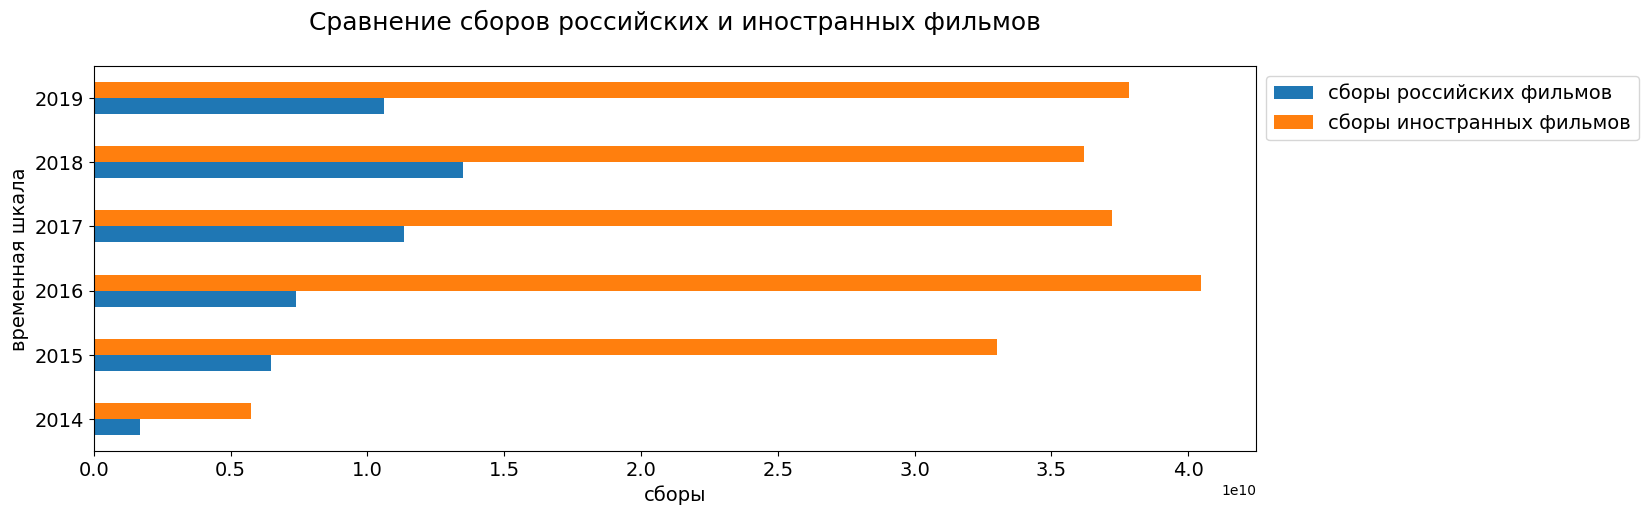

In [215]:
data_ros_for.loc[2014:2019]\
    .plot.barh(figsize=(15,5), fontsize=14)\
    .set_title('Сравнение сборов российских и иностранных фильмов\n', fontsize=18)
plt.legend(['сборы российских фильмов', 'сборы иностранных фильмов'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('сборы', fontsize=14)
plt.ylabel('временная шкала', fontsize=14)
plt.show();

In [141]:
data_ros_for['rate'] = (data_ros_for['for_box_office'] / data_ros_for['rus_box_office']).round(2)
data_ros_for

,rus_box_office,for_box_office,rate
show_year,,,
2010,"242,819.00","2,185,835.00",9.00
2011,"385,795.00","13,716,970.00",35.56
2012,"1,040,653.00","5,914,770.00",5.68
2013,"23,056,859.70","6,742,846.50",0.29
2014,"1,705,756,253.40","5,739,195,605.80",3.36
2015,"6,469,869,350.78","33,027,495,845.62",5.10
2016,"7,401,538,671.68","40,464,761,070.23",5.47
2017,"11,333,222,524.42","37,230,484,693.09",3.29
2018,"13,476,745,057.37","36,191,658,076.95",2.69


**Промежуточный вывод:** иностранные фильмы бьют российские по сборам и в ~3 раза (2014, 2017, 2018), и в ~4 раза (2019) и даже в ~5-5,5 раз (2015, 2016) 

### 5.4. Самый крутой режисер по сборам и по рейтингу

In [155]:
data_dir = data.pivot_table(index='first_dir', values=['ratings', 'box_office'], aggfunc=['median','max', 'count']).reset_index()
data_dir.columns = ['first_dir', 'median_box_office', 'median_rating', 
                    'max_box_office', 'max_rating','count_b_office', 'count_r']
data_dir

,first_dir,median_box_office,median_rating,max_box_office,max_rating,count_b_office,count_r
0,Ёлкин Туйчиев,"58,733.50",5.10,"58,733.50",5.10,1,2
1,Ён Сан-хо,"8,459,304.83",7.10,"8,459,304.83",7.10,1,1
2,А Андрющенко,"137,326,373.00",5.50,"137,326,373.00",5.50,1,1
3,А. Калюжный,"802,765.00",6.80,"802,765.00",6.80,1,1
4,А. Кутерье,"3,094,683.00",0.00,"3,094,683.00",0.00,1,1
...,...,...,...,...,...,...,...
4597,хореография Мариуса Петипа в редакции Наталии ...,NaN,0.00,NaN,0.00,0,1
4598,хореография Питера Райта,NaN,0.00,NaN,0.00,0,2
4599,хореография Пьера Лакотта по Филиппу Тальони,NaN,0.00,NaN,0.00,0,1
4600,хореография Фредерика Аштона,NaN,0.00,NaN,0.00,0,1


In [160]:
# отбор режисеров по среднему показателю сборов, 
# учитываем те строки, где данные по сборам есть более, чем у 4 фильмов режисера
data_dir.query('count_b_office > 4').sort_values(by='median_box_office', ascending=False).head(20)

,first_dir,median_box_office,median_rating,max_box_office,max_rating,count_b_office,count_r
3850,Т.Бекмамбетов,"308,401,482.70",6.20,"701,507,030.27",6.90,5,6
1293,Джеймс Ван,"272,871,725.20",6.90,"1,486,131,019.00",7.10,5,10
1639,Дэвид Йейтс,"265,900,788.30",7.70,"1,520,626,501.45",8.10,6,9
2104,К.Шипенко,"190,739,004.28",6.90,"3,073,568,690.79",7.40,6,6
1114,Д.Дьяченко,"92,372,336.31",6.45,"1,655,037,688.00",7.80,8,8
4326,Шон Андерс,"87,382,668.68",6.30,"178,652,162.00",7.40,5,6
3532,С.Андреасян,"66,504,721.61",4.00,"393,279,629.43",7.60,11,11
3397,Ридли Скотт,"47,602,971.00",7.20,"970,276,839.80",8.60,5,16
1747,Е.Баранов,"28,373,445.60",5.95,"453,616,494.54",6.40,7,8
1153,Д.Суворов,"28,345,493.00",4.50,"93,743,018.64",7.60,5,5


In [163]:
# отбор режисеров по среднему показателю рейтинга, 
# учитываем те строки, где данные по рейтигу есть более, чем у 8 фильмов режисера
data_dir.query('count_r > 8').sort_values(by='median_rating', ascending=False).head(20)

,first_dir,median_box_office,median_rating,max_box_office,max_rating,count_b_office,count_r
2299,Кристофер Нолан,"4,596,241.50",8.50,"316,040,320.00",8.70,4,11
983,Гай Ричи,"644,787,381.70",8.10,"716,241,845.00",8.60,2,11
2336,Л.Гайдай,550.00,8.10,"2,060.00",8.80,5,11
3229,Питер Джексон,"195,060.00",8.10,"279,056,211.80",8.60,3,13
1681,Дэвид Финчер,"822,023.00",7.90,"822,023.00",8.60,1,12
1639,Дэвид Йейтс,"265,900,788.30",7.70,"1,520,626,501.45",8.10,6,9
3436,Роберт Земекис,"235,444,487.00",7.65,"302,904,460.60",8.90,3,10
2219,Клинт Иствуд,"124,719,701.28",7.60,"152,082,035.70",8.10,3,13
3810,Стивен Спилберг,"240,148,219.85",7.45,"738,802,825.71",8.20,4,12
3928,Тиль Швайгер,250.00,7.30,250.00,7.90,1,14


**Промежуточный вывод:** по тем данным, которые есть, самый успешный по сборам режисер — Т.Бекмамбетов, а снимает самые популярные фильмы — Кристофер Нолан.

Вообще сохраню себе я это исследование, и буду выбирать фильмы, если  вдруг не смотрела :)

## Шаг 6. Общий вывод

**Было выполнено:**
* предобработка данных:
  * объединены 2 датафрейма по общему столбцу
  * изменен типа данных колонки с датой на datetime
  * исправлена часть неявных дубликатов
  * проведен анализ пропусков, пропуски заполнены там, где это целесообразно
  * проведена оценка объемов государственного финансирования фильмов, оценка окупаемости
  * добавлены новые столбцы: год проката, доля господдрежки в бюджете фильма, режисер + основной жанр
* построены визуализации, показывающие динамику проката всех фильмов по годам и динамику проката фильмов с данными о сборах по годам
* построена визуализация динамики сборов по годам
* построены визуализации динамики сборов в зависимости от возрастных ограничений по годам
* построены визуализации 
  * динамики количества фильмов с господдержкой
  * динамики сборов от доли господдержки
  * динамики рейтинга в зависимости от источника финансирования
* выявлены популярные жанры
* построена визуализация сравнения российских и иностранных фильмов
* был проведен поиск "популярного режисера" по сборам и по рейтингу

**Динамика проката фильмов по годам**
* Если смотреть просто по количеству фильмов за каждый год, то нет какой-либо зависимости, то поднимается, то опускается, только за последние 2 года (18-й и 19-й) количество фильмов в прокате увеличилось
* если смотреть на долю фильмов с информацией по сборам, то видно, что до 2013 года включительно такая доля < 30%
* в 2014 году доля таких фильмов уже 35%, а в 2015-2019гг доля таких фильмов в среднем 63%
   - это объясняется тем, что в 2014 году Фонд кино по заключенному государственному контракту от 12.05.2014г. №1252-01-41/03/14 стал опертором ЕАИС. Назначение указанной системы состоит в сборе, учёте и обработке сведений о публичной демонстрации кинофильмов в кинозалах российских кинотеатров. То есть до 2014 года, такие данные централизованно не обрабатывались: https://ekinobilet.fond-kino.ru/about/history/

**Динамика сборов по годам**
* с 2010 по 2013 количество сборов примерно на одном уровне ~ 13,32 млн.р
* резкий скачок в 2014 году до 7.44 млрд.р в связи с контрактом от 12.05.2014г. №1252-01-41/03/14
* в 2015 скачок относительно 2014 года до 39.5 млрд.р,
  - здесь я думаю скачок связан с тем, что данные в 2014-м году только с мая, а летом в прокат выходят не кассовые фильмы, ну и система отрабатывалась скорее всего.
* с 2016 по 2018, сборы одного порядка ~48.7 млрд.р, немного увеличивались с каждым годом.
* в 2019 - сборы немного упали


* самые высокие средние и медианные сборы в 2017 году, я думаю это потому что в 2017 году меньше фильмов, чем в 2015, 16, 18, 19 г.г., но зато в этом году вышел кассовый фильм "Движение вверх", сборы которого на 1_000_000_000 больше сборов других фильмов и в 2017, и в других годах
* до 2014 года смотреть на средние и медианные значения особо нет смысла, выборка — нерепрезентативная
* с 2014 года медианные значения на порядок меньше средних - это говорит о том, что каждый год есть несколько кассовых фильмов, сборы которых очень высокие по сравнению с остальными фильмами.
* в целом средние значения то снижаются, то поднимаются от года к году, какой-то линейной тенденции нет
* каждый год есть несколько кассовых фильмов, сборы которых на несколько порядков выше сборов остальных фильмов. 

**Фильмы с господдержкой** 

* больше всего в качестве господержки выделяют суммы до 250 млн.р.
* медианный бюджет фильмов с господдержкой = 70 млн.р
* основная часть фильмов (221 из 332) не возвращают средства господдержки обратно
* есть несколько фильмов с господдержкой с колоссальным бюджетом >= 1 млрд.р.
* бюджет большей части фильмов с господдержкой на 60% — это государственные деньги

**Источник финансирования**
  - почти половина фильмов с господдержкой финансируется из Министерства культуры 
  - немного меньше половины из Фонда кино
  - и оставшаяся часть из совместного фонда
  
**Доля фильмов с господдержкой**
  - в 2015 году почти половина российских фильмов получила господдержку, потом доля таких фильмов пошла на убыль до 0,11 (2018), а в 2019 снова увеличилась до 0,2
  
**Рейтинг фильмов**  
  - совместное финансирование МК и ФК чаще всего дает лучше результат, чем финансирование по отдельности, кроме 2016г. и 2019г.
  

**Зависимость сборов от господдержки**
* сборы очень низкие, независимо от доли господдержки в бюджете фильма, есть только несколько фильмов с высокими сборами, но это совсем не потому, что они получили господдержку. Если посмотреть выборочно на фильмы, котороые получили господдержку * то выясняется, что большинство фильмов — это абсолютно неизвестные, никогда нигде не цитируемые фильмы, то есть обосновали получение господдержки, сняли фильм (возможно для конкурса, какого-нибудь фестиваля, а может вообще просто так), поучавствовали и все, на полку. И не факт, что это плохие фильмы — просто о них никто не знает

**Зависимость рейтинга от возрастного ограничения**
* Если брать весь срез с 2015 по 2019 года:
  - то самые кассовые фильмы — это "16+",
  - на втором месте — "12+"
  - на третьем с небольшим отставанием — "6+"
  - на четвертом месте — "18+", немного больше от половины сборов "16+"
  - а меньше всего сборов принесли фильмы "0+"
* От года к году картина немного меняется:
  - в 2019 год, почти одинаковое распределение между категориями "6+", "16+", "12+", лишь немного вперед ушла категория "6+"
  - категории "6+" и "12+" постоянно меняются местами

**Зависят ли сборы от рейтинга, а рейтинг от бюджета**


* фильмы с высоким рейтингом могут провалиться в прокате,
* и наоборот фильм с высокими сборами может иметь довольно низкий рейтинг,
* фильм с малым бюджетом может иметь успех,
* и наоборот фильм с раздутым бюджетом может быть довольно посредственным
* в номинации "самая дорогая единица рейтинга" выигрывает фильм "Тайна печати дракона"(2019, россия, китай)
* пойду смотреть с сыном "Колобанга" :)

**Зависят ли сборы и рейтинг от жанра**

* рейтинг не зависит от жанра, а вот сборы зависят
* средний рейтинг среди тех фильмов, которые имеют рейтинг
* самый кассовый жанр — спорт (если взглянуть на список фильмов, то кассовость жанра определил фильм "Движение вверх" (2017))
* остальные жанры практически ожидаемо заняли свои места, напишу первые 3 после спорта:
  - 2-е место: фантастика (это все супергеройские фильмы)
  - 3: фэнтези
  - 4: боевик
* на фильмы этих жанров идут с большей вероятностью, чем на другие 

**Российские фильмы VS зарубежные фильмы**
* иностранные фильмы бьют российские по сборам 
  * в ~3 раза (2014, 2017, 2018)
  * в ~4 раза (2019)
  * в ~5-5,5 раз (2015, 2016) 

**Самый крутой режисер** по тем данным, которые есть, самый успешный по сборам режисер — Т.Бекмамбетов, а снимает самые популярные фильмы — Кристофер Нолан.

**Распределение фильмов по типу:**
* Большая часть фильмов относится к типу Художественный
* Меньшая часть фильмов относится к типу музыкально-развлекательный